#### Name : Susmita Rani Saha , ID : B180305047                            
#### Name : Tanvir Ahammed Hridoy , ID : B180305020

# Multiple Linear Regression(Marketing_Data.csv) :

## 1. Exploratory Data Analysis
We'll load the data into a DataFrame using Pandas:

In [38]:
import pandas as pd

Let's read the CSV file and package it into a DataFrame:

In [39]:
path_to_file = 'Marketing_Data.csv'
df = pd.read_csv(path_to_file)

Once the data is loaded in, let's take a quick peek at the first 5 values using the head() method:

In [40]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


We can also check the shape of our dataset via the shape property:

In [41]:
df.shape

(171, 4)

There is no consensus on the size of our dataset. Let's keep exploring it and take a look at the descriptive statistics of this new data. This time, we will facilitate the comparison of the statistics by rounding up the values to two decimals with the round() method, and transposing the table with the T property:

In [42]:
print(df.describe().round(2).T)

           count    mean     std   min    25%     50%     75%     max
youtube    171.0  178.02  102.45  0.84  91.08  179.76  262.98  355.68
facebook   171.0   27.67   17.91  0.00  11.70   26.76   43.68   59.52
newspaper  171.0   35.24   24.90  0.36  13.74   31.08   50.88  121.08
sales      171.0   16.92    6.31  1.92  12.54   15.48   20.82   32.40


The Seaborn plot we are using is regplot, which is short from regression plot. It is a scatterplot that already plots the scattered data along with the regression line. If you'd rather look at a scatterplot without the regression line, use sns.scatteplot instead.

These are our four plots:

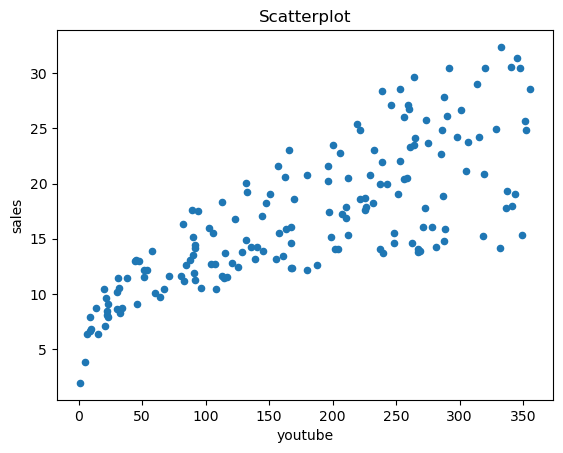

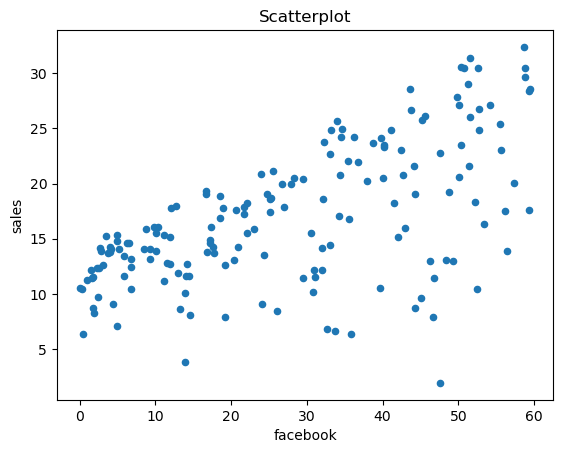

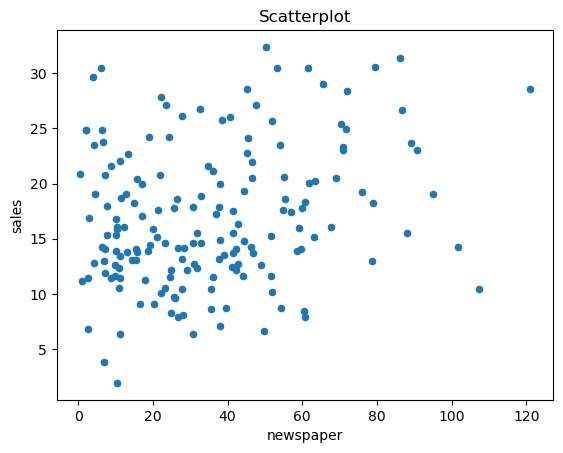

In [43]:
import seaborn as sns 
import matplotlib.pyplot as plt
variables = ['youtube','facebook','newspaper']
for var in variables:
    df.plot.scatter(x=var, y='sales', title='Scatterplot');
    #plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes best-fitting regression line ,which can be turned off via `fit_reg=False`
   #sns.regplot(x=var, y='price', data=df).set(title=f'Regression plot of {var} and Price');

We can also calculate the correlation of the new variables, this time using Seaborn's heatmap() to help us spot the strongest and weaker correlations based on warmer (reds) and cooler (blues) tones:

[Text(0.5, 1.0, 'Heatmap of Consumption Data - Pearson Correlations')]

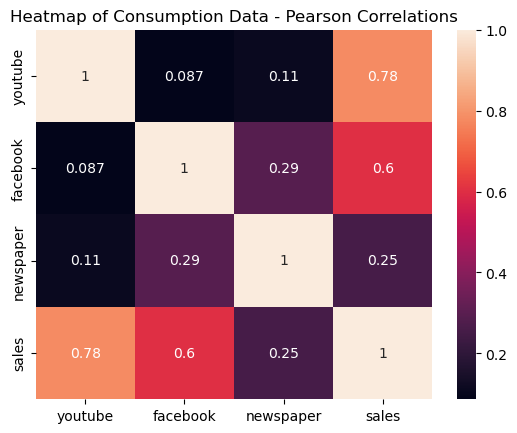

In [45]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations')


## Preparing the Data
We can use double brackets [[ ]] to select them from the dataframe:

In [46]:
y = df['sales']
X = df[['youtube','facebook','newspaper']
]


In [47]:
from sklearn.model_selection import train_test_split

After setting our X and y sets, we can divide our data into train and test sets. We will be using the same seed and 20% of our data for training:

In [48]:

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

## Training the Multivariate Model
After splitting the data, we can train our multiple regression model. Notice that now there is no need to reshape our X data, once it already has more than one dimension:

In [49]:
X.shape

(171, 3)

To train our model we can execute the same code as before, and use the fit() method of the LinearRegression class:

In [50]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

After fitting the model and finding our optimal solution, we can also look at the intercept and And at the coefficients of the features :

In [51]:
print(regressor.intercept_)
print(regressor.coef_)

3.703049890164598
[ 4.41858407e-02  1.94481975e-01 -4.88341093e-05]


To do that, we can assign our column names to a feature_names variable, and our coefficients to a model_coefficients variable. After that, we can create a dataframe with our features as an index and our coefficients as column values called coefficients_df:

In [52]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

           Coefficient value
youtube             0.044186
facebook            0.194482
newspaper          -0.000049


## Making Predictions with the Multivariate Regression Model
let's predict with the test data:

In [53]:
y_pred = regressor.predict(X_test)

Now, that we have our test predictions, we can better compare them with the actual output values for X_test by organizing them in a DataFrameformat:

In [54]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

     Actual  Predicted
101    1.92  12.981440
55    26.04  25.056751
56    18.24  18.237407
139   20.52  20.628560
157   12.36  11.588295
78    10.44   8.564984
135   14.28  13.347692
104   23.52  23.173040
109   11.52  12.026338
108   24.96  24.956584
162   11.88  10.226422
137    9.60  13.425923
51    14.16  13.983903
15    10.20  11.029214
45    20.40  20.758500
29    28.56  26.453658
69    30.48  28.932720
30    22.08  21.759115
140   18.00  21.250927
24    25.44  24.163692
60    20.04  20.677450
167   11.64   9.840897
19    17.76  19.434332
16    17.88  18.236546
144   14.04  14.288361
18    27.84  26.107388
12    20.52  20.880692
114   12.48  10.577497
9     12.12  12.217487
113   24.12  23.140564
31     9.72   7.005284
90     7.92   8.464443
132   15.96  16.599178
76    23.04  21.840222
117   15.84  18.137027


In [56]:
regressor.score(X_test,y_test)

0.872863085701216

## Evaluating the Multivariate Model
After exploring, training and looking at our model predictions - our final step is to evaluate the performance of our multiple linear regression. We want to understand if our predicted values are too far from our actual values. We'll do this in the same way we had previously done, by calculating the MAE, MSE and RMSE metrics.

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [58]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 1.40
Mean squared error: 5.58
Root mean squared error: 2.36
